# Kaggle API

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#!pip install kaggle

In [ ]:
#!rm -r /root/.kaggle

In [ ]:
#! mkdir ~/.kaggle

In [ ]:
#! cp kaggle.json ~/.kaggle

In [ ]:
#! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#! kaggle datasets download -d jangedoo/utkface-new

In [ ]:
#! unzip utkface-new.zip

# GPU

In [2]:
import tensorflow as tf

In [3]:
device_list = tf.test.gpu_device_name()

device_list

''

In [4]:
!nvidia-smi

/bin/bash: nvidia-smi: command not found


# Packages

In [2]:
import numpy as np
import pandas as pd 
import os
import cv2
from sklearn.svm import SVC
from skimage.feature import hog
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from skimage.color import rgb2gray
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from keras.applications import VGG16
from skimage.feature import hog
from skimage import data, exposure
import random
from keras import layers, losses
from keras.models import Model
from sklearn.metrics import classification_report, accuracy_score, matthews_corrcoef, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
import math
from keras.utils.np_utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix

# Functions

In [3]:
def display(img):
    plt.imshow(img)
    plt.show()
    
    
def metrics_gender(X, y): 
    y_pred = clf.predict(X)

    mcc = matthews_corrcoef(y, y_pred)
   
    print("MCC: ", mcc)
    
    print(classification_report(y_test, y_pred))

    labelGender = list(set(y_genders))

    cm = confusion_matrix(y_test, y_pred)

    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=labelGender, yticklabels=labelGender)

    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')

    
def metrics_age(X, y):

    y_pred = clf.predict(X)

 
    mcc = matthews_corrcoef(y, y_pred)

    print("MCC: ", mcc)

    print(classification_report(y, y_pred))

    labelage= list(set(y_age_classes))

    cm = confusion_matrix(y, y_pred)

    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=labelage, yticklabels=labelage)
    # set plot labels and title
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
     

# Load Balanced Data

In [4]:
import zipfile

with zipfile.ZipFile('/content/drive/MyDrive/new_data.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/drive/MyDrive/new_data')

## Age Classes

In [ ]:
#age_classes_vars = np.load('../../../data_project/new_data/age_classes_vars.npz')
age_classes_vars = np.load('/content/drive/MyDrive/new_data/content/new_data/age_classes_vars.npz')

X_age_classes = age_classes_vars['x']
y_age_classes = age_classes_vars['y']

print(X_age_classes.shape)
print(len(y_age_classes))

(3480, 200, 200, 3)
3480


## Genders

In [5]:
gender_vars = np.load('/content/drive/MyDrive/new_data/content/new_data/gender_vars.npz')
#gender_vars = np.load('../../../data_project/new_data/gender_vars.npz')

X_genders = gender_vars['x']
y_genders = gender_vars['y']

print(X_genders.shape)
print(len(y_genders))

(20000, 200, 200, 3)
20000


# Models

## BASE

### Gender

In [ ]:
# flattened_images_genders = []

# for image in X_genders:
#     flattened_image = image.flatten()
#     flattened_images_genders.append(flattened_image)

# flattened_images_genders = np.array(flattened_images_genders)

In [ ]:
# perm = np.random.permutation(len(flattened_images_genders))
# reduced_X_genders = flattened_images_genders[perm]
# reduced_y_genders = y_genders[perm]

# #use only a portion of the shuffled arrays for the train-test split
# reduced_X_genders = reduced_X_genders[:10000]
# reduced_y_genders = reduced_y_genders[:10000]

In [ ]:
# np.savez('reduced_gender_vars.npz', x=reduced_X_genders, y=reduced_y_genders)

In [ ]:
reduced_gender_vars = np.load('/content/reduced_gender_vars.npz')
#gender_vars = np.load('../../../data_project/new_data/gender_vars.npz')

reduced_X_genders = reduced_gender_vars['x']
reduced_y_genders = reduced_gender_vars['y']

print(reduced_X_genders.shape)
print(len(reduced_y_genders))

(10000, 120000)
10000


MCC:  0.737269807783979
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       990
           1       0.88      0.86      0.87      1010

    accuracy                           0.87      2000
   macro avg       0.87      0.87      0.87      2000
weighted avg       0.87      0.87      0.87      2000



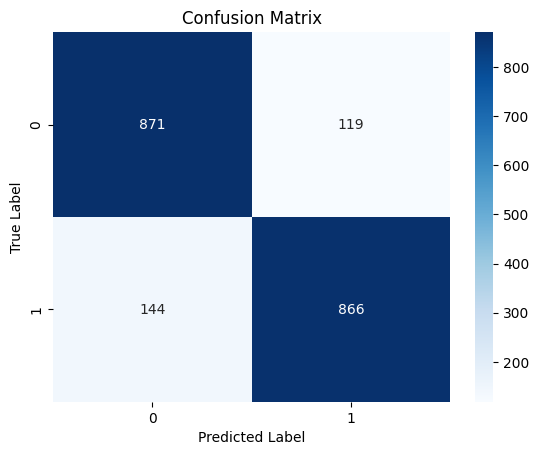

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(reduced_X_genders, reduced_y_genders, test_size=0.2, random_state=42)

#clf = SVC()
#clf.fit(X_train, y_train)


metrics_gender(X_test, y_test)

### Age

In [ ]:
flattened_images_age_classes = []

for image in X_age_classes:
    flattened_image = image.flatten()
    flattened_images_age_classes.append(flattened_image)

flattened_images_age_classes = np.array(flattened_images_age_classes)

MCC:  0.46102593095279604
              precision    recall  f1-score   support

           0       0.63      0.93      0.75       107
           1       0.54      0.29      0.37       133
           2       0.60      0.47      0.52       118
           3       0.48      0.45      0.46       119
           4       0.38      0.37      0.37        95
           5       0.57      0.81      0.67       124

    accuracy                           0.55       696
   macro avg       0.53      0.55      0.53       696
weighted avg       0.54      0.55      0.53       696



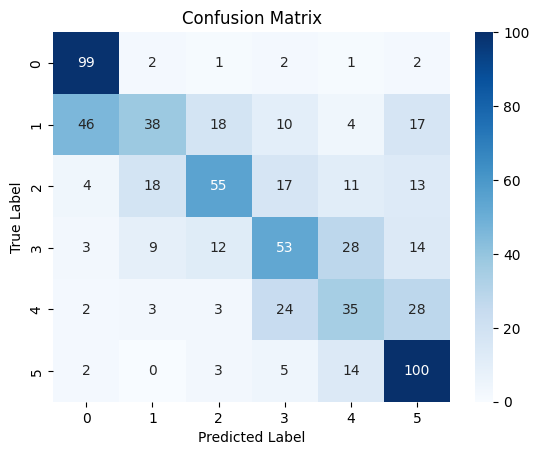

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(flattened_images_age_classes, y_age_classes, test_size=0.2, random_state=42)
clf = OneVsRestClassifier(SVC())
clf.fit(X_train, y_train)

metrics_age(X_test, y_test)

## HOG

### Gender

In [ ]:
perm = np.random.permutation(len(X_genders))
X_genders = X_genders[perm]
y_genders = y_genders[perm]

#use only a portion of the shuffled arrays for the train-test split
X_genders = X_genders[:10000]
y_genders = y_genders[:10000]

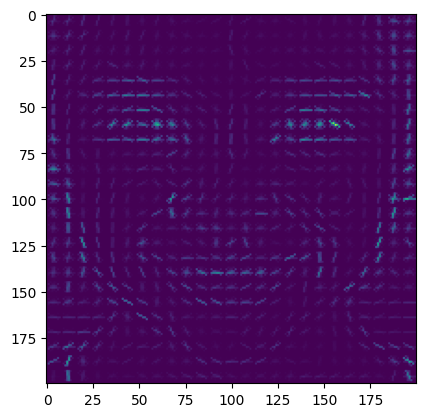

In [ ]:
image_check = X_genders[25]

# define HOG parameters
orientations = 9
pixels_per_cell = (8, 8)
cells_per_block = (2, 2)

# compute HOG features and visualize them
hog_features, hog_image = hog(image_check, orientations=9, pixels_per_cell=(8, 8),
                    cells_per_block=(2, 2), transform_sqrt=True, feature_vector=True, visualize=True,channel_axis=2)

# display HOG features
plt.imshow(hog_image)
plt.show()

In [ ]:
# Extract HOG features from the images
hog_features = []
for img in X_genders:
    #hog_feature = hog(img, orientations=9, pixels_per_cell=(8, 8),
    #                cells_per_block=(2, 2), transform_sqrt=True, feature_vector=True, multichannel=True, channel_axis=2)
    hog_feature = hog(img, orientations=9, pixels_per_cell=(8, 8),
                    cells_per_block=(2, 2), transform_sqrt=True, feature_vector=True, channel_axis=2)
    
    hog_features.append(hog_feature)
hog_features = np.array(hog_features)

MCC:  0.8010233984373955
              precision    recall  f1-score   support

           0       0.89      0.90      0.90       982
           1       0.91      0.90      0.90      1018

    accuracy                           0.90      2000
   macro avg       0.90      0.90      0.90      2000
weighted avg       0.90      0.90      0.90      2000



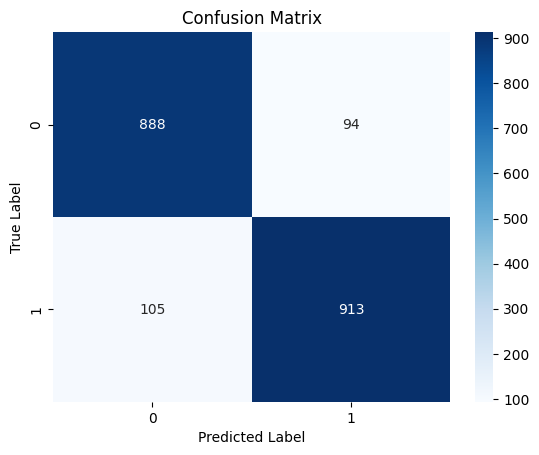

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(hog_features, y_genders, test_size=0.2, random_state=42)

clf = SVC()
clf.fit(X_train, y_train)

metrics_gender(X_test, y_test)

### Age

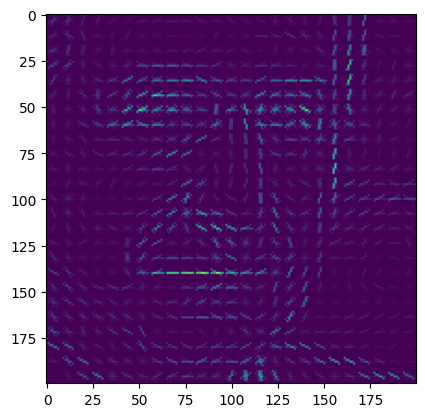

In [ ]:
image_check = X_age_classes[25]

# define HOG parameters
orientations = 9
pixels_per_cell = (8, 8)
cells_per_block = (2, 2)

# compute HOG features and visualize them
hog_features, hog_image = hog(image_check, orientations=9, pixels_per_cell=(8, 8),
                    cells_per_block=(2, 2), transform_sqrt=True, feature_vector=True, visualize=True,channel_axis=2)


# display HOG features
plt.imshow(hog_image)
plt.show()

In [ ]:
# Extract HOG features from the images
hog_features = []
for img in X_age_classes:
    #hog_feature = hog(img, orientations=9, pixels_per_cell=(8, 8),
    #                cells_per_block=(2, 2), transform_sqrt=True, feature_vector=True, multichannel=True, channel_axis=2)
    hog_feature = hog(img, orientations=9, pixels_per_cell=(8, 8),
                    cells_per_block=(2, 2), transform_sqrt=True, feature_vector=True, channel_axis=2)
    
    hog_features.append(hog_feature)
hog_features = np.array(hog_features)

MCC:  0.5623171422024966
              precision    recall  f1-score   support

           0       0.63      0.98      0.77       107
           1       0.74      0.37      0.49       133
           2       0.64      0.61      0.63       118
           3       0.58      0.52      0.55       119
           4       0.49      0.44      0.47        95
           5       0.68      0.87      0.76       124

    accuracy                           0.63       696
   macro avg       0.63      0.63      0.61       696
weighted avg       0.64      0.63      0.61       696



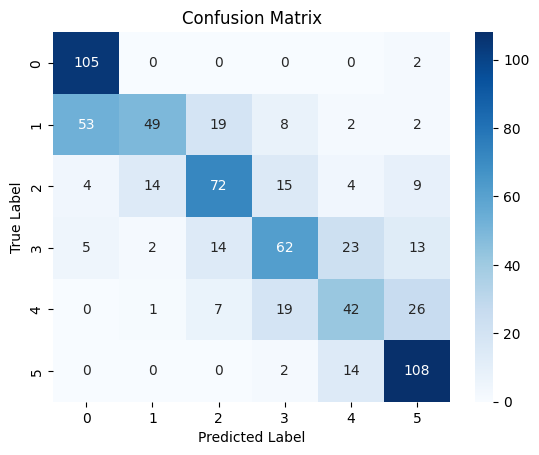

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(hog_features, y_age_classes, test_size=0.2, random_state=42)
clf = OneVsRestClassifier(SVC())
clf.fit(X_train, y_train)

metrics_age(X_test, y_test)

## ORB

### Gender

In [ ]:
orb_X_genders = []
for img in X_genders:
    img = img * 255.0
    orb_X_genders.append(img)

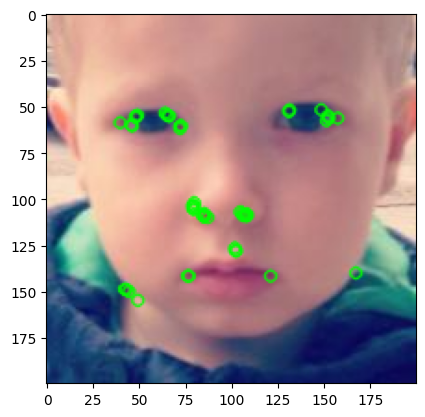

In [ ]:
image_check = orb_X_genders[1]
image_check = cv2.convertScaleAbs(image_check)
orb_X_genders = [cv2.convertScaleAbs(img) for img in orb_X_genders]

orb = cv2.ORB_create()

kp = orb.detect(image_check, None)

kp, des = orb.compute(image_check, kp)

img2 = cv2.drawKeypoints(image_check, kp, None, color=(0,255,0), flags=0)
plt.imshow(img2)
plt.show()

In [ ]:
orb = cv2.ORB_create()
# define minimum and maximum keypoints
MIN_KEYPOINTS = 100
orb_features = []
orb_genders = []

# loop over images and keypoints
for i, img in enumerate(orb_X_genders):
    keypoints, descriptors = orb.detectAndCompute(img, None)
    keypoints, descriptors = orb.compute(image_check, keypoints)
    keypoints = list(keypoints)    
    # check if number of keypoints is between min and max
    if len(keypoints) < MIN_KEYPOINTS:
        continue
        
    # remove extra keypoints randomly
    while len(keypoints) > MIN_KEYPOINTS:
        idx = random.randint(0, len(keypoints)-1)
        keypoints.pop(idx)
        descriptors = np.delete(descriptors, idx, axis=0)
        
    # add descriptors to feature list
    orb_features.append(np.ndarray.flatten(descriptors))
    orb_genders.append(y_genders[i])
    

mean = np.mean(orb_features, axis=0)
std = np.std(orb_features, axis=0)
orb_features_norm = (orb_features - mean) / std

MCC:  0.3453657304810056
              precision    recall  f1-score   support

           0       0.64      0.68      0.66       556
           1       0.71      0.67      0.69       645

    accuracy                           0.67      1201
   macro avg       0.67      0.67      0.67      1201
weighted avg       0.67      0.67      0.67      1201



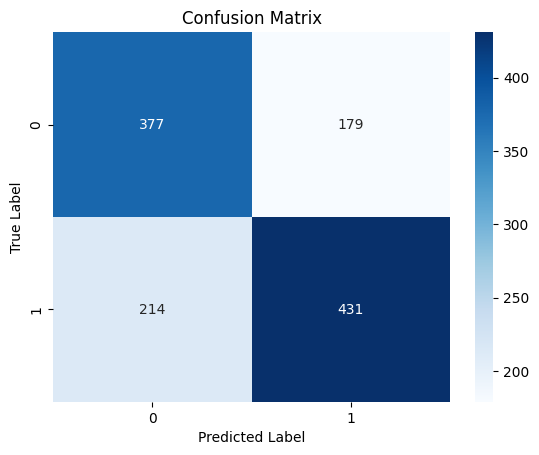

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(orb_features_norm, orb_genders, test_size=0.2, random_state=42)

clf = SVC()
clf.fit(X_train, y_train)

metrics_gender(X_test, y_test)

### Age

In [ ]:
orb_X_age_classes = []
for img in X_age_classes:
    img = img * 255.0
    orb_X_age_classes.append(img)

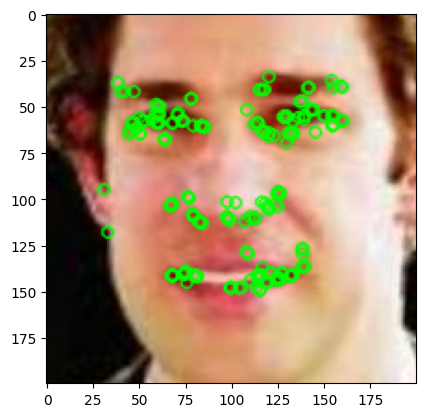

In [ ]:
image_check = orb_X_age_classes[1]
image_check = cv2.convertScaleAbs(image_check)
orb_X_age_classes = [cv2.convertScaleAbs(img) for img in orb_X_age_classes]

orb = cv2.ORB_create()

kp = orb.detect(image_check, None)

kp, des = orb.compute(image_check, kp)

img2 = cv2.drawKeypoints(image_check, kp, None, color=(0,255,0), flags=0)
plt.imshow(img2)
plt.show()

In [ ]:
orb = cv2.ORB_create()
# define minimum and maximum keypoints
MIN_KEYPOINTS = 100
orb_features = []
orb_ages = []

# loop over images and keypoints
for i, img in enumerate(orb_X_age_classes):
    keypoints, descriptors = orb.detectAndCompute(img, None)
    keypoints, descriptors = orb.compute(image_check, keypoints)
    keypoints = list(keypoints)    
    # check if number of keypoints is between min and max
    if len(keypoints) < MIN_KEYPOINTS:
        continue
        
    # remove extra keypoints randomly
    while len(keypoints) > MIN_KEYPOINTS:
        idx = random.randint(0, len(keypoints)-1)
        keypoints.pop(idx)
        descriptors = np.delete(descriptors, idx, axis=0)
        
    # add descriptors to feature list
    orb_features.append(np.ndarray.flatten(descriptors))
    orb_ages.append(y_age_classes[i])

mean = np.mean(orb_features, axis=0)
std = np.std(orb_features, axis=0)
orb_features_norm = (orb_features - mean) / std

MCC:  0.1570389962476128
              precision    recall  f1-score   support

           0       0.44      0.65      0.52        69
           1       0.16      0.16      0.16        68
           2       0.33      0.27      0.30        88
           3       0.24      0.18      0.20        67
           4       0.24      0.14      0.18        64
           5       0.29      0.37      0.32        82

    accuracy                           0.30       438
   macro avg       0.28      0.30      0.28       438
weighted avg       0.28      0.30      0.28       438



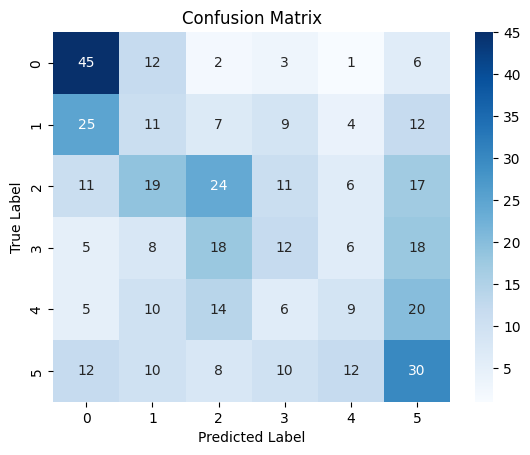

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(orb_features_norm, orb_ages, test_size=0.2, random_state=42)

clf = OneVsRestClassifier(SVC())
clf.fit(X_train, y_train)

metrics_age(X_test, y_test)

## VGG 16

### Gender

In [ ]:
VGG_model = VGG16(weights='imagenet', include_top=False, input_shape=(200, 200, 3))

for layer in VGG_model.layers:
	layer.trainable = False
	
VGG_model.summary()

X = np.stack(X_genders)
X = VGG_model.predict(X)
X_svm = X.reshape(X.shape[0], -1)

58889256/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 200, 200, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 200, 200, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 100, 100, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 100, 100, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 100, 100, 128)     147584    
                                                              

MCC:  0.7301956106545789
              precision    recall  f1-score   support

           0       0.84      0.89      0.87       982
           1       0.89      0.84      0.86      1018

    accuracy                           0.86      2000
   macro avg       0.87      0.86      0.86      2000
weighted avg       0.87      0.86      0.86      2000



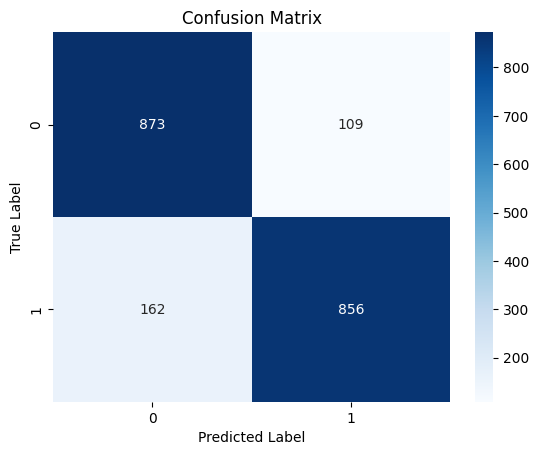

In [ ]:
##### Gender
X_svm = X.reshape(X.shape[0], -1)
X_train, X_test, y_train, y_test = train_test_split(X_svm, y_genders, test_size=0.2, random_state=42)

clf = SVC()
clf.fit(X_train, y_train)

metrics_gender(X_test, y_test)

### Age

In [ ]:
VGG_model = VGG16(weights='imagenet', include_top=False, input_shape=(200, 200, 3))

for layer in VGG_model.layers:
	layer.trainable = False
	
VGG_model.summary()

X = np.stack(X_age_classes)
X = VGG_model.predict(X)
X_svm = X.reshape(X.shape[0], -1)

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 200, 200, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 200, 200, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 100, 100, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 100, 100, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 100, 100, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 50, 50, 128)       0     

MCC:  0.508458695291739
              precision    recall  f1-score   support

           0       0.61      0.98      0.75       107
           1       0.56      0.25      0.34       133
           2       0.59      0.49      0.53       118
           3       0.54      0.57      0.56       119
           4       0.45      0.32      0.37        95
           5       0.65      0.90      0.76       124

    accuracy                           0.58       696
   macro avg       0.57      0.59      0.55       696
weighted avg       0.57      0.58      0.55       696



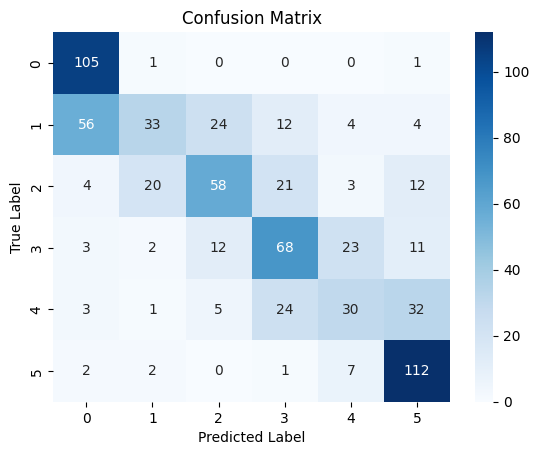

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_svm, y_age_classes, test_size=0.2, random_state=42)

clf = OneVsRestClassifier(SVC())
clf.fit(X_train, y_train)

metrics_age(X_test, y_test)

## Autoencoder

### Gender

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_genders, y_genders, test_size=0.2, random_state=42)

X_train = np.array(X_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2], 3))

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2], 3))

In [ ]:
input = layers.Input(shape=(200, 200, 3))

#valor alto apanha artefactos, e valor baixo nao captura bem as features da imagem
latent_dim = 2000

## Classe 

# Encoder

#didnt increase filter count in encoder and decrease equally in decoder because
#it can lead to overfitting

x = layers.Conv2D(64, (3,3), activation='relu', padding='same', strides = 2)(input)
#x = layers.MaxPooling2D((2,2), padding='same')(x)#dividir imagem por factor de 2
x = layers.Conv2D(32, (3,3), activation='relu', padding='same', strides = 2)(x)#reduziu se nr de filtros para 32 porque foi decidido factor de 32 filtros
#x = layers.MaxPooling2D((2,2), padding='same')(x)
x = layers.Conv2D(16, (3,3), activation='relu', padding='same', strides = 2)(x)
#x = layers.MaxPooling2D((2,2), padding='same')(x)#25*25*16=10000
x = layers.Flatten()(x)
enc = layers.Dense(latent_dim, activation='relu')(x)

# Decoder

#having conv2D here helps to avoid checkerboard artifacts
#which are alternating points of colors (like checkerboard)
#that are consequence of deconvolutioning an image and cause 
#loss of quality in final reconstruction
#x = layers.Conv2D(16, (3,3), activation='relu', padding='same')(x)

#equivalente a fazer dense layer no fim do encoder e no inicio do decoder
#fazer a layer dense fica um vector
#fazer reshape depois do 2 dense para voltar a ter imagem do vetor criado

x = layers.Dense(25*25*16, activation='relu')(enc)
x = layers.Reshape((25,25,16))(x)
#x = layers.UpSampling2D((2,2))(x)
x = layers.Conv2DTranspose(32, (3, 3), activation="relu", padding="same", strides = 2)(x)
#x = layers.UpSampling2D((2,2))(x)
x = layers.Conv2DTranspose(64, (3,3), activation='relu', padding='same', strides = 2)(x)
#x = layers.UpSampling2D((2,2))(x)
output = layers.Conv2DTranspose(3, (3,3), activation='sigmoid', padding='same', strides = 2)(x)

#maybe use strides in the layers too
#example:
#x = layers.Conv2D(16, (3,3), activation='relu', padding='same', strides = 2)(x)

# Autoencoder
autoencoder = Model(input, output)

# binary cross entropy is good for image feature extraction especially when images are normalized
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 100, 100, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 32)        18464     
                                                                 
 conv2d_2 (Conv2D)           (None, 25, 25, 16)        4624      
                                                                 
 flatten (Flatten)           (None, 10000)             0         
                                                                 
 dense (Dense)               (None, 2000)              20002000  
                                                                 
 dense_1 (Dense)             (None, 10000)             200100

In [ ]:
autoencoder.fit(x = X_train, 
                y = X_train,
                epochs = 20,
                shuffle = True,
                batch_size = 32,
                validation_data = (X_test, X_test),
)

Epoch 1/20
250/250 [==============================] - 15s 33ms/step - loss: 0.6138 - val_loss: 0.5767
Epoch 2/20
250/250 [==============================] - 5s 21ms/step - loss: 0.5693 - val_loss: 0.5662
Epoch 3/20
250/250 [==============================] - 5s 21ms/step - loss: 0.5629 - val_loss: 0.5625
Epoch 4/20
250/250 [==============================] - 5s 21ms/step - loss: 0.5595 - val_loss: 0.5607
Epoch 5/20
250/250 [==============================] - 5s 21ms/step - loss: 0.5574 - val_loss: 0.5582
Epoch 6/20
250/250 [==============================] - 5s 21ms/step - loss: 0.5559 - val_loss: 0.5596
Epoch 7/20
250/250 [==============================] - 5s 21ms/step - loss: 0.5549 - val_loss: 0.5573
Epoch 8/20
250/250 [==============================] - 5s 21ms/step - loss: 0.5540 - val_loss: 0.5555
Epoch 9/20
250/250 [==============================] - 5s 21ms/step - loss: 0.5532 - val_loss: 0.5548
Epoch 10/20
250/250 [==============================] - 5s 21ms/step - loss: 0.5528 - val_l

In [ ]:
new_model = Model(input, enc)

pred_train = new_model.predict(X_train)
pred_test = new_model.predict(X_test)

encoded_X_train = pred_train.reshape((pred_train.shape[0], -1))
encoded_X_test = pred_test.reshape((pred_test.shape[0], -1))

63/63 [==============================] - 0s 5ms/step


MCC:  0.7679248076376746
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       982
           1       0.89      0.89      0.89      1018

    accuracy                           0.88      2000
   macro avg       0.88      0.88      0.88      2000
weighted avg       0.88      0.88      0.88      2000



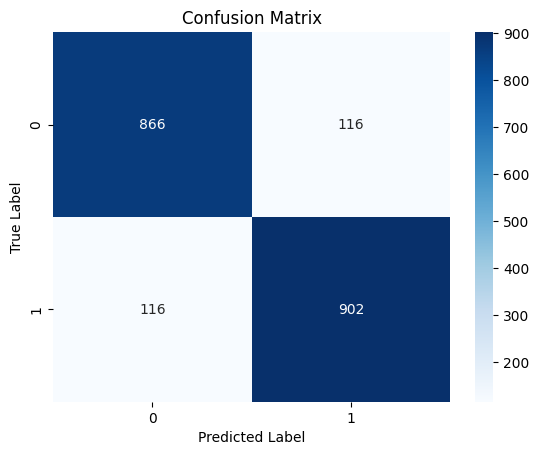

In [ ]:
clf = SVC()
clf.fit(encoded_X_train, y_train)

metrics_gender(encoded_X_test, y_test)

### Age

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_age_classes, y_age_classes, test_size=0.2, random_state=42)
X_train = np.array(X_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2], 3))

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2], 3))

In [ ]:
# binary cross entropy is good for imagprint("Autoencoder Started")
#### AUtoencoder
input = layers.Input(shape=(200, 200, 3))

#valor alto apanha artefactos, e valor baixo nao captura bem as features da imagem
latent_dim = 2000

## Classe 

# Encoder

#didnt increase filter count in encoder and decrease equally in decoder because
#it can lead to overfitting

x = layers.Conv2D(64, (3,3), activation='relu', padding='same', strides = 2)(input)
#x = layers.MaxPooling2D((2,2), padding='same')(x)#dividir imagem por factor de 2
x = layers.Conv2D(32, (3,3), activation='relu', padding='same', strides = 2)(x)#reduziu se nr de filtros para 32 porque foi decidido factor de 32 filtros
#x = layers.MaxPooling2D((2,2), padding='same')(x)
x = layers.Conv2D(16, (3,3), activation='relu', padding='same', strides = 2)(x)
#x = layers.MaxPooling2D((2,2), padding='same')(x)#25*25*16=10000
x = layers.Flatten()(x)
enc = layers.Dense(latent_dim, activation='relu')(x)

# Decoder

#having conv2D here helps to avoid checkerboard artifacts
#which are alternating points of colors (like checkerboard)
#that are consequence of deconvolutioning an image and cause 
#loss of quality in final reconstruction
#x = layers.Conv2D(16, (3,3), activation='relu', padding='same')(x)

#equivalente a fazer dense layer no fim do encoder e no inicio do decoder
#fazer a layer dense fica um vector
#fazer reshape depois do 2 dense para voltar a ter imagem do vetor criado

x = layers.Dense(25*25*16, activation='relu')(enc)
x = layers.Reshape((25,25,16))(x)
#x = layers.UpSampling2D((2,2))(x)
x = layers.Conv2DTranspose(32, (3, 3), activation="relu", padding="same", strides = 2)(x)
#x = layers.UpSampling2D((2,2))(x)
x = layers.Conv2DTranspose(64, (3,3), activation='relu', padding='same', strides = 2)(x)
#x = layers.UpSampling2D((2,2))(x)
output = layers.Conv2DTranspose(3, (3,3), activation='sigmoid', padding='same', strides = 2)(x)

#maybe use strides in the layers too
#example:
#x = layers.Conv2D(16, (3,3), activation='relu', padding='same', strides = 2)(x)

# Autoencoder
autoencoder = Model(input, output)

# binary cross entropy is good for image feature extraction especially when images are normalized
autoencoder.compile(optimizer="adam", loss="binary_crossentropy",
            metrics=['accuracy'])

autoencoder.summary()#e feature extraction especially when images are normalized

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 conv2d_9 (Conv2D)           (None, 100, 100, 64)      1792      
                                                                 
 conv2d_10 (Conv2D)          (None, 50, 50, 32)        18464     
                                                                 
 conv2d_11 (Conv2D)          (None, 25, 25, 16)        4624      
                                                                 
 flatten_3 (Flatten)         (None, 10000)             0         
                                                                 
 dense_6 (Dense)             (None, 2000)              20002000  
                                                                 
 dense_7 (Dense)             (None, 10000)             2001

In [ ]:
autoencoder.fit(X_train, X_train,
                epochs = 20,
                shuffle = True,
                batch_size = 32,
                validation_data = (X_test, X_test),
)

Epoch 1/20
87/87 [==============================] - 6s 31ms/step - loss: 0.6615 - accuracy: 0.9067 - val_loss: 0.6234 - val_accuracy: 0.9296
Epoch 2/20
87/87 [==============================] - 2s 22ms/step - loss: 0.5987 - accuracy: 0.9260 - val_loss: 0.5869 - val_accuracy: 0.9292
Epoch 3/20
87/87 [==============================] - 2s 22ms/step - loss: 0.5816 - accuracy: 0.9258 - val_loss: 0.5778 - val_accuracy: 0.9293
Epoch 4/20
87/87 [==============================] - 2s 22ms/step - loss: 0.5753 - accuracy: 0.9257 - val_loss: 0.5733 - val_accuracy: 0.9287
Epoch 5/20
87/87 [==============================] - 2s 22ms/step - loss: 0.5711 - accuracy: 0.9250 - val_loss: 0.5706 - val_accuracy: 0.9284
Epoch 6/20
87/87 [==============================] - 2s 22ms/step - loss: 0.5685 - accuracy: 0.9235 - val_loss: 0.5688 - val_accuracy: 0.9269
Epoch 7/20
87/87 [==============================] - 2s 22ms/step - loss: 0.5667 - accuracy: 0.9218 - val_loss: 0.5720 - val_accuracy: 0.9248
Epoch 8/20
87

In [ ]:
new_model = Model(input, enc)

pred_train = new_model.predict(X_train)
pred_test = new_model.predict(X_test)


encoded_train = pred_train.reshape((pred_train.shape[0], -1))
encoded_test = pred_test.reshape((pred_test.shape[0], -1))

22/22 [==============================] - 0s 5ms/step


MCC:  0.4717247022795698
              precision    recall  f1-score   support

           0       0.69      0.95      0.80       107
           1       0.56      0.37      0.45       133
           2       0.59      0.42      0.49       118
           3       0.47      0.42      0.44       119
           4       0.40      0.39      0.39        95
           5       0.56      0.80      0.66       124

    accuracy                           0.56       696
   macro avg       0.54      0.56      0.54       696
weighted avg       0.55      0.56      0.54       696



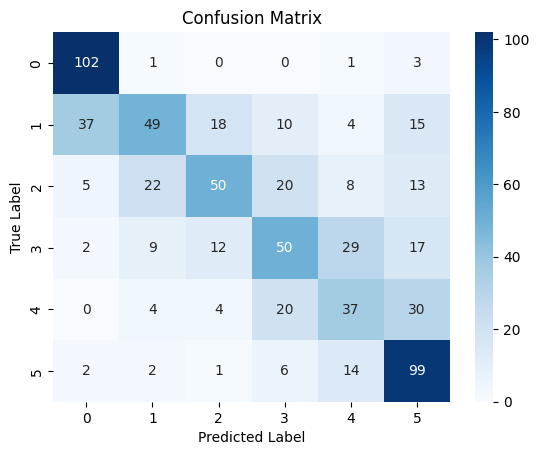

In [ ]:
clf = OneVsRestClassifier(SVC())
clf.fit(encoded_train, y_train)


metrics_age(encoded_test, y_test) 

## Improved SVM

### Gender

In [ ]:
perm = np.random.permutation(len(X_genders))
X_genders = X_genders[perm]
y_genders = y_genders[perm]

#use only a portion of the shuffled arrays for the train-test split
X_genders = X_genders[:15000]
y_genders = y_genders[:15000]

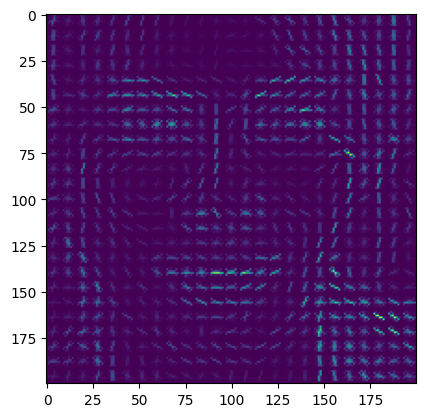

In [6]:
image_check = X_genders[25]

# define HOG parameters
orientations = 9
pixels_per_cell = (8, 8)
cells_per_block = (2, 2)

# compute HOG features and visualize them
hog_features, hog_image = hog(image_check, orientations=9, pixels_per_cell=(8, 8),
                    cells_per_block=(2, 2), transform_sqrt=True, feature_vector=True, visualize=True,channel_axis=2)

# display HOG features
plt.imshow(hog_image)
plt.show()

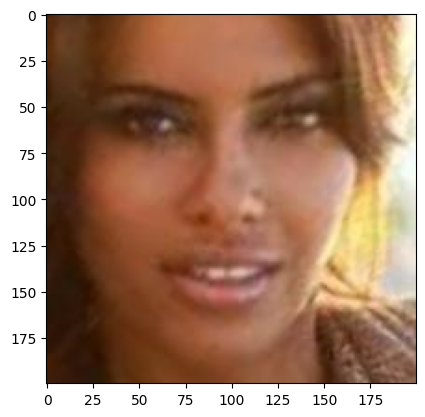

In [7]:
# display HOG features
plt.imshow( X_genders[25])
plt.show()

In [8]:
# Extract HOG features from the images
hog_features = []
for img in X_genders:
    #hog_feature = hog(img, orientations=9, pixels_per_cell=(8, 8),
    #                cells_per_block=(2, 2), transform_sqrt=True, feature_vector=True, multichannel=True, channel_axis=2)
    hog_feature = hog(img, orientations=9, pixels_per_cell=(8, 8),
                    cells_per_block=(2, 2), transform_sqrt=True, feature_vector=True, channel_axis=2)
    
    hog_features.append(hog_feature)
hog_features = np.array(hog_features)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(hog_features, y_genders, test_size=0.2, random_state=42)

clf = SVC()
clf.fit(X_train, y_train)

SVC()

MCC:  0.7825510306538647
              precision    recall  f1-score   support

           0       0.90      0.89      0.89      2031
           1       0.88      0.90      0.89      1969

    accuracy                           0.89      4000
   macro avg       0.89      0.89      0.89      4000
weighted avg       0.89      0.89      0.89      4000



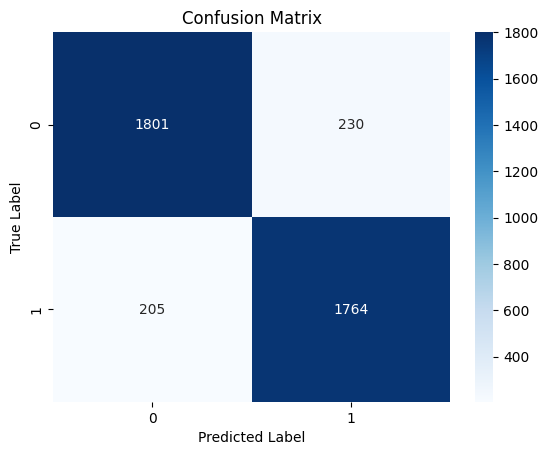

In [11]:
metrics_gender(X_test, y_test)